# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортируем библиотеку пандас
import pandas as pd 

In [2]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#в отдельной переменной
#сохраняем датасет,читая файл и указывая все необходимые параметры(путь к файлу, разделители столбцов 
#и разделители десятичных знаков)
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
#выводим полученный датасет на экран
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#выводим на экран информацию о датасете,изучаем количество пропусков в данных,типы данных по столбцам
#названия колонок и пр.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

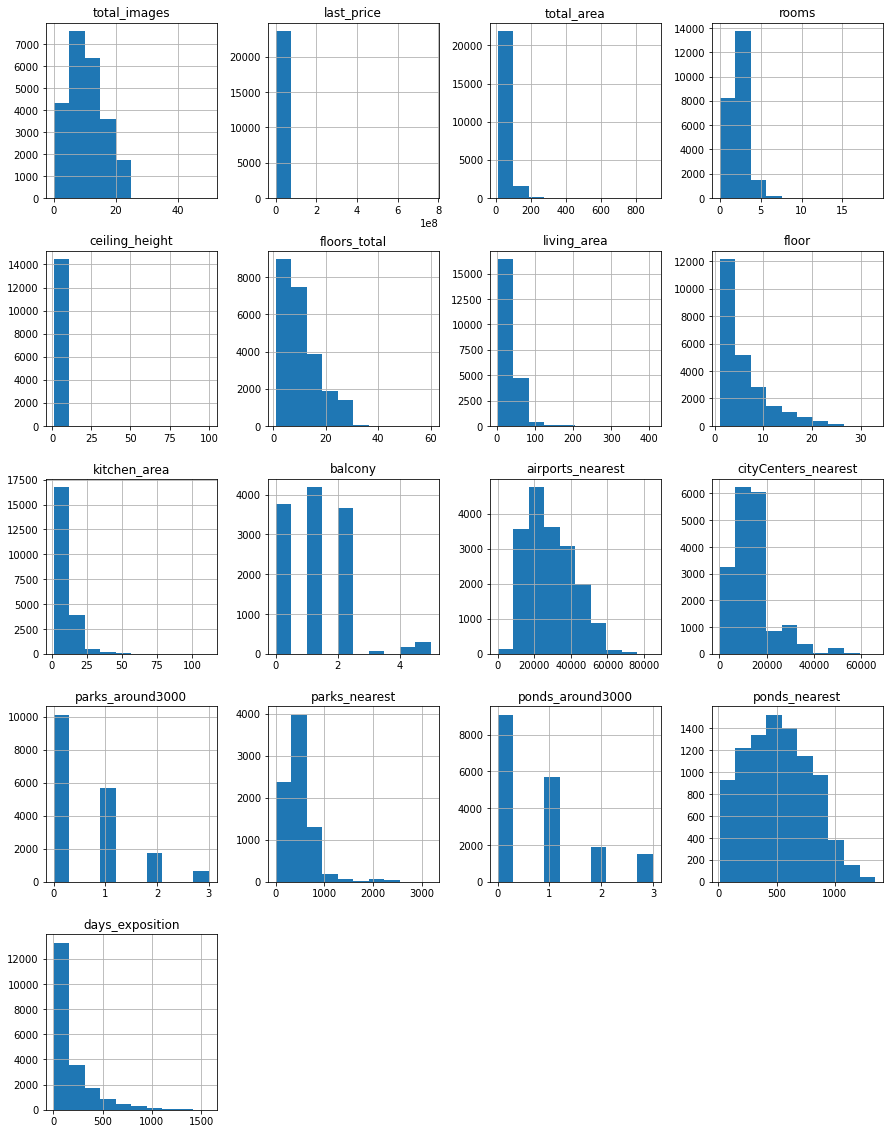

In [5]:
data.hist(figsize=(15, 20));

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


По полученной информации видно, что многие столбцы, хранящие информацию в цифрах имеют тип object из-за чего нельзя провести по ним анализ. Для начала, приведем необходимые столбцы к корректному типу, избавимся от пропусков на сколько это возможно и приведем данные к корректному виду.

# Предобработка данных

Для начала скорректируем названия столбцов.

In [7]:
data=data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',
                        'studio': 'is_studio',
                        'open_plan': 'is_open_plan'
                       })
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Начнем со столбца first_day_exposition. Изменим его тип на datetime для более корректного отражения даты

In [8]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y%m%dT%H:%M:%S')

Проверим, сколько пропусков содержит каждая колонка

In [9]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [10]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

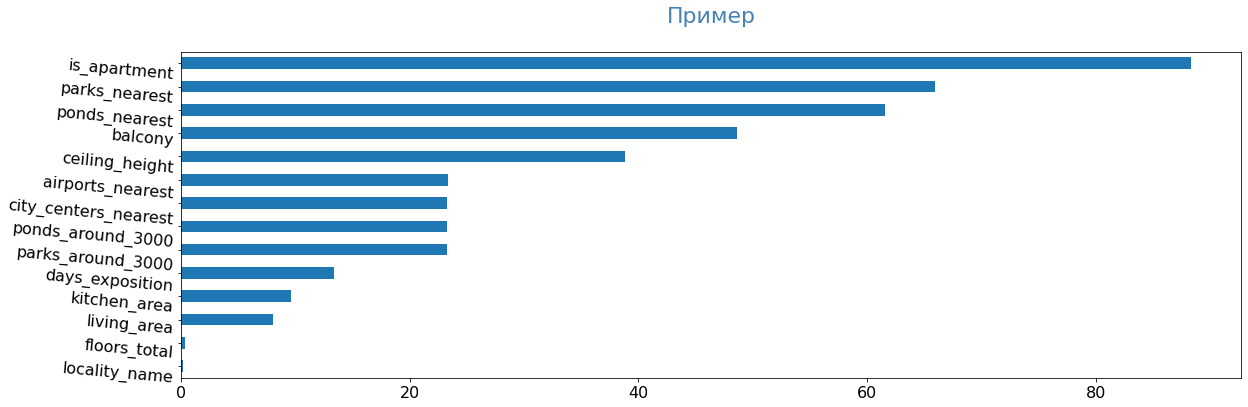

In [11]:
pass_value_barh(data)

Удалим полные дубликаты

In [12]:
data.duplicated().sum()
data.dropna(how = 'all')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [13]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  is_studio             23699 non-null  bool          
 11  is_open_plan          23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Начнем с пропусков в столбце с количеством балконов. Логично предположить, что если количество балконов не указано, значит в квартире их нет. Заполняем пропуски нулевыми значениями и изменяем тип данных в столбце.

In [14]:
data['balcony']=data['balcony'].fillna(0).astype('int')

Аналогичным образом поступаем и с указанием аппартаментов. Этот столбец содержит булевые значения, поэтому приводим его к булевому типу, а не целочисленному

In [15]:
data['is_apartment']=data['is_apartment'].fillna(0).astype('bool')


Также предположим, что если не указано количество прудов и парков, то скорее всего их нет в заданном радиусе. Заполняем пропуски нулями и меняем тип колонок на целочисленные значения.

In [16]:
data['ponds_around_3000']=data['ponds_around_3000'].fillna(0)
data['ponds_around_3000']=pd.to_numeric(data['ponds_around_3000']).astype('int')

data['ponds_nearest']=data['ponds_nearest'].fillna(0)
data['ponds_nearest']=pd.to_numeric(data['ponds_nearest']).astype('int')


In [17]:
data['parks_around_3000']=data['parks_around_3000'].fillna(0)
data['parks_around_3000']=pd.to_numeric(data['parks_around_3000']).astype('int')

data['parks_nearest']=data['parks_nearest'].fillna(0)
data['parks_nearest']=pd.to_numeric(data['parks_nearest']).astype('int')

Сложно заполнить пропуски в общем количестве этажей в доме. Мы можем предположить, что общее количесво этажей в доме будет: этаж, на котором расположена продаваемая квартира + 1, но такие данные будут некорректны и могут в будущем повлиять на оценку. Так как строк, с пропущенными значениями в данном столце, не так много (менее 0,5% от общего числа данных), то на итоговый результат их удаление не повлияет в значительной мере.

<AxesSubplot:>

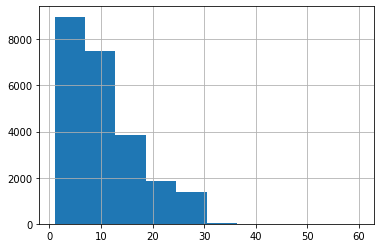

In [18]:
data['floors_total']=pd.to_numeric(data['floors_total'])
data=data.dropna(subset=['floors_total'] , axis=0)  
data['floors_total']=data['floors_total'].astype('int')
data['floors_total'].hist(bins=10)

Пропущенные значения в столбце с названиями населенных пунктов тоже не так много и их тоже необходимо удалить, так как заполнить их мы не имеем возможности.

In [19]:
data=data.dropna(subset=['locality_name'] , axis=0)  

Обработаем неявные дубликаты в столбце с названиями населенных пунктов. Для начала заменим все "ё" на "е".

In [20]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
print(data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'

Видим, что, например, Приладожский и Рахья записаны как садовое товарищество и как поселок городского типа. Удалим типы населенных пунктов, оставив только названия

In [21]:
def multiple_replace(name_in, replace_names):
    for i in replace_names:
        name_in = name_in.str.replace(i,'')
    return name_in
replace_names =( ['поселок ',
                  'село ',
                  'садовое товарищество',
                  'садоводческое некоммерческое товарищество ',
                  'при железнодорожной станции ' ,
                  'городского типа ' ,
                  'коттеджный ' ,
                  'деревня ' ,
                  'городской ',
                  'станции ']
               )
data['locality_name'] = multiple_replace(data['locality_name'], replace_names)


In [22]:
# check
data.locality_name.nunique()

307

Информацию об удаленности от центра города приводим к числовому типу данных. Смотрим какое среднее расстояние до центра в отдельных населенных пунктах

                 city_centers_nearest
locality_name                        
Александровская          27468.000000
Белоостров               38868.000000
Зеленогорск              54617.583333
Колпино                  32113.771513
Красное Село             30034.741379
Кронштадт                49195.726316
Левашово                 25727.000000
Лисий Нос                27613.333333
Ломоносов                50739.969697
Металлострой             27561.348485
Молодежное               65529.200000
Павловск                 33206.921053
Парголово                19924.776758
Песочный                 26475.250000
Петергоф                 35468.925373
Петро-Славянка           27165.000000
Понтонный                32293.450000
Пушкин                   28745.375000
Репино                   43392.250000
Санкт-Петербург          11588.493939
Саперный                 35854.666667
Сестрорецк               34624.480874
Стрельна                 23374.302326
Усть-Ижора               28222.500000
Шушары      

<AxesSubplot:>

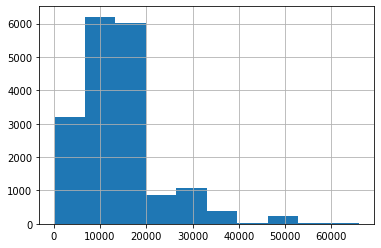

In [24]:
data['city_centers_nearest']=pd.to_numeric(data['city_centers_nearest'])
group_center=data.pivot_table(index='locality_name',aggfunc='mean', values='city_centers_nearest')
print(group_center)
data['city_centers_nearest'].hist(bins=10)

In [25]:
for wer in data['locality_name'].unique():
    data.loc[(data['locality_name'] == wer) & (data['city_centers_nearest'].isna()),'city_centers_nearest']=(
    data.loc[(data['locality_name'] == wer), 'city_centers_nearest'].mean()
    )
data=data[data['city_centers_nearest'] != 0]

Так как не во всех населенных пунктах имеются данные об удаленности от центра, заполняем средним значением по тем населенным пунктам, по которым можно было посчитать среднее расстояние. Остальные оставляем неизменными. Мы помним, что в нашем перечне если и поселки и СНТ, в которых не всегда есть центр, поэтому данный показатель не так значим.
Так же расстояние до центра города свыше 60км кажутся довольно странными, учитывая, что по данным,найденным в интернете, самое большое расстояние от крайней точки Санкт-Петербурга до центра составляет 47км. Но оставим эти данные так как они не сильно повлияют на результат.

                 airports_nearest
locality_name                    
Александровская      12896.500000
Белоостров           57769.000000
Зеленогорск          73300.250000
Колпино              26375.863501
Красное Село         26610.028736
Кронштадт            67469.263158
Левашово             52693.000000
Лисий Нос            55302.333333
Ломоносов            48308.280303
Металлострой         25726.484848
Молодежное           84430.200000
Павловск             21053.342105
Парголово            53994.926606
Песочный             54565.500000
Петергоф             40184.676617
Петро-Славянка       20605.000000
Понтонный            30581.400000
Пушкин               16447.869919
Репино               62293.250000
Санкт-Петербург      28040.281621
Саперный             34142.666667
Сестрорецк           56640.486339
Стрельна             28145.395349
Усть-Ижора           26510.500000
Шушары               16061.458716


<AxesSubplot:>

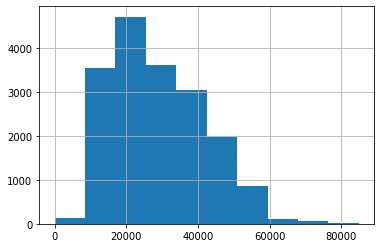

In [26]:
data['airports_nearest']=pd.to_numeric(data['airports_nearest'])
group_aiports=data.pivot_table(index='locality_name',aggfunc='mean', values='airports_nearest')
print(group_aiports)
data['airports_nearest'].hist(bins=10)

<AxesSubplot:>

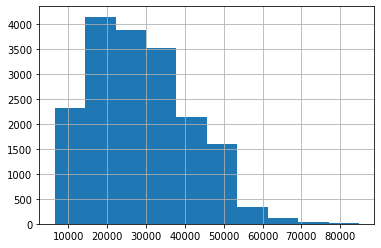

In [27]:
for wer in data['locality_name'].unique():
    data.loc[(data['locality_name'] == wer) & (data['airports_nearest'].isna()),'airports_nearest']=(
    data.loc[(data['locality_name'] == wer), 'airports_nearest'].mean()
    )
data=data[data['airports_nearest'] != 0]
data['airports_nearest'].hist(bins=10)

С аэропортами то же самое. Не все считают нужным указывать удаленность населенного пункта и места расположения квартиры от аэропорта. Также мы видим немногочисленное количество обьявления с неадекватным расстоянием до аэропорта.

Для удобства дальнейшей работы приведем к числовому типу данных столбцы с данными по общей площади квартиры,площади кухни и жилой площади

In [28]:
data['total_area']=pd.to_numeric(data['total_area'])
data['kitchen_area']=pd.to_numeric(data['kitchen_area'])
data['living_area']=pd.to_numeric(data['living_area'])

In [29]:
data['total_area'].describe()


count    23564.000000
mean        60.323911
std         35.657425
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Минимальная квадратура в обьявлениях 12м2. По закону, площадь жилых помещений должна составлять не менее 14м2. Также квартира в 900м2 кажется чем-то нереальным. Возможно, в данных есть ошибка, нужно проверить.

In [30]:
sorted(data['total_area'].unique(),reverse=True)

[900.0,
 631.2,
 631.0,
 618.0,
 590.0,
 517.0,
 507.0,
 500.0,
 495.0,
 494.1,
 491.0,
 488.0,
 483.9,
 470.3,
 460.8,
 441.98,
 431.0,
 422.2,
 413.5,
 410.0,
 402.0,
 401.0,
 400.0,
 399.0,
 398.0,
 380.0,
 374.6,
 374.0,
 373.1,
 371.0,
 365.0,
 364.7,
 364.0,
 363.1,
 363.0,
 356.0,
 347.5,
 347.0,
 342.0,
 338.6,
 336.0,
 327.2,
 323.0,
 320.0,
 317.0,
 316.3,
 315.0,
 313.0,
 312.0,
 310.0,
 309.7,
 307.8,
 304.0,
 301.9,
 300.0,
 297.5,
 295.0,
 293.6,
 292.2,
 290.6,
 290.0,
 288.0,
 287.5,
 285.7,
 284.0,
 283.3,
 283.0,
 281.1,
 280.3,
 280.0,
 277.6,
 275.0,
 274.65,
 274.0,
 272.6,
 270.0,
 268.0,
 267.7,
 266.2,
 263.8,
 260.0,
 259.6,
 259.2,
 257.0,
 256.0,
 255.0,
 254.0,
 253.7,
 253.0,
 251.0,
 250.3,
 250.2,
 250.0,
 249.9,
 249.7,
 249.0,
 248.7,
 248.0,
 245.8,
 245.4,
 245.0,
 244.0,
 243.0,
 242.4,
 241.0,
 240.0,
 239.0,
 238.26,
 237.8,
 237.0,
 236.4,
 236.0,
 235.0,
 234.0,
 232.0,
 231.6,
 231.2,
 231.0,
 230.1,
 230.0,
 229.0,
 228.0,
 226.0,
 225.0,
 224.

In [31]:
data[data['total_area']==900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,0,2,318,106.0


Данная строчка кажется очень подозрительной,к тому же она всего одна,удалим ее и квартиры не подходящие под критерий, описанный выше.

In [32]:
data=data.query('900 > total_area >= 14')

Проверяем, есть ли еще в таблице некорректные данные, связанные с этим столбцом.

In [33]:
data.query('(kitchen_area + living_area) >= total_area*0.9')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04,3,NaN,14,59.0,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1,725,1,759,179.0
171,6,3800000.0,49.0,2019-02-22,2,2.50,9,38.0,8,False,...,10.0,1,Шушары,18471.0,24272.0,0,0,0,0,11.0
184,7,2600000.0,30.2,2018-02-14,1,2.65,9,26.1,5,False,...,6.2,0,Санкт-Петербург,13952.0,15031.0,0,0,1,824,12.0
220,8,3890000.0,37.0,2018-07-09,1,2.50,25,28.0,6,False,...,9.0,0,Санкт-Петербург,25408.0,16166.0,0,0,0,0,28.0
319,19,4850000.0,59.7,2015-03-19,3,2.50,5,47.4,4,False,...,6.4,1,Санкт-Петербург,43095.0,15599.0,0,0,0,0,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21,4,NaN,5,90.2,4,False,...,16.0,0,Санкт-Петербург,26259.0,4961.0,0,0,2,838,1052.0
23297,10,1850000.0,48.2,2019-03-13,2,NaN,5,42.2,2,False,...,6.0,1,Высоцк,NaN,NaN,0,0,0,0,45.0
23328,12,4299000.0,54.0,2016-11-25,2,NaN,14,40.0,8,False,...,10.0,0,Колпино,25612.0,31399.0,0,0,0,0,343.0
23521,13,8500000.0,65.0,2018-11-01,2,NaN,4,44.0,2,False,...,15.3,0,Санкт-Петербург,22276.0,3996.0,1,627,0,0,NaN


По закону под общей площадью понимается сумма площадей всех помещений квартиры. В неё включаются:
Все жилые комнаты;
Кухня, санузлы, коридор;
Кладовки;
Стены и перегородки.
Поэтому сумма жилой площади и площади кухни не могут превышать размера общей площади квартиры, тут какая-то ошибка, такие данные лучше удалить.

In [34]:
data.drop(index=data.query('(kitchen_area + living_area) >= total_area*0.9').index, inplace=True)

In [35]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23084 non-null  int64         
 1   last_price            23084 non-null  float64       
 2   total_area            23084 non-null  float64       
 3   first_day_exposition  23084 non-null  datetime64[ns]
 4   rooms                 23084 non-null  int64         
 5   ceiling_height        14171 non-null  float64       
 6   floors_total          23084 non-null  int64         
 7   living_area           21222 non-null  float64       
 8   floor                 23084 non-null  int64         
 9   is_apartment          23084 non-null  bool          
 10  is_studio             23084 non-null  bool          
 11  is_open_plan          23084 non-null  bool          
 12  kitchen_area          20867 non-null  float64       
 13  balcony         

Пропущенные значения заполняем примерными данными, опираясь на общую площадь квартиры. Допустим, 70% от общей площади будет занимать жилая площадь, а 20% -площадь кухни.

In [36]:
for index in data[data['living_area'].isna()].index:
    data.loc[index,'living_area']=data.loc[index,'total_area']*0.6

При этом, площадь, допустим, спальни, не должна быть менее 8м2.

In [38]:
data=data.query('living_area >= 8')

In [40]:
for k in data[data['kitchen_area'].isna()].index:
    #data.loc[k,'kitchen_area']=(data.loc[k,'total_area'])*0.2
    data.loc[k,'kitchen_area']=(data.loc[k,'total_area']*0.9 - data.loc[k,'living_area'])*0.5

Предположим, что 10% от общей площади квартиры занимают стены,кладовки и пр. при этом, площадь квартиры не должна быть менее 8м2.

In [45]:
data=data.query('kitchen_area >= 4')

Еще раз проверяем

In [47]:
data.query('(kitchen_area + living_area) >= total_area*0.9').shape[0]

54

In [48]:
data.drop(index=data.query('(kitchen_area + living_area) >= total_area*0.9').index, inplace=True)

Меняем тип данных в столбце с указанием высоты потолков и изучаем уникальные значения в этом столбце.

In [49]:
data['ceiling_height']=pd.to_numeric(data['ceiling_height'])

In [50]:
print(sorted(data['ceiling_height'].unique()))

[1.0, 2.0, 2.3, 2.4, 2.45, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.25, 2.34, 2.46, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 6.0, 8.0, 8.3, 10.3, 14.0, 20.0,

Средняя высота потолков в стандартной квартире в Спб от 2,5 м. до 3,6 м. Возможно, при введении данных возникла ошибка, поэтому исправим значения больше 10, умножив их на 0.1. А значения, которые ниже 2.4 и выше 6 удалим. Сотые окгруглим до десятых.

In [51]:
data.loc[data['ceiling_height'] >= 10,'ceiling_height'] = data['ceiling_height']*0.1

Если это возможно, заполним пропуски медианым значением высоты потолков в отдельном населенном пункте. Оставшиеся пропуски заполним медианым значением по всему столбцу и округли значения до одного знака после запятой.

In [52]:
for town in data['locality_name'].unique():
    data.loc[(data['locality_name'] == town) & (data['ceiling_height'].isna()),'ceiling_height']= \
    data.loc[data['locality_name'] == town,'ceiling_height'].median()
    data.loc[data['ceiling_height'].isna(),'ceiling_height']= \
    data['ceiling_height'].median()

In [53]:
data['ceiling_height']=round(data['ceiling_height'],2)

In [54]:
data['ceiling_height'].unique()

array([2.7 , 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 , 2.55,
       3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 2.52, 5.2 , 2.87, 2.66, 2.59,
       2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 5.3 , 5.  , 2.79, 2.95, 4.06, 2.94, 3.7 ,
       3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65, 3.9 ,
       3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52,
       3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 ,
       4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  , 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 3.22, 3.27, 4.1 , 2.68, 2.93, 3.46,
       3.47, 3.63, 3.33, 3.32, 1.2 , 8.3 , 2.86, 3.17, 4.4 , 3.28, 3.04,
       4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69,
       3.31, 4.65, 3.56, 3.51, 3.93, 3.42, 2.46, 3.

In [56]:
data=data.query('2.4 <= ceiling_height <= 6')

В столбце со стоимостью квартир пропусков нет, но помотрим информацию о нем

In [59]:
data['last_price'].describe()

count    2.262100e+04
mean     6.535168e+06
std      1.059414e+07
min      1.219000e+04
25%      3.490000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальная цена 12190р. Вероятно, была допущена ошибка при заполнении и реальная цена 12190т.р. Изменим данные и приведем весь столбец к значениям в т.р. для более корректного отображения данных

In [60]:
data.loc[data['last_price'] == 12190,'last_price']=data.loc[data['last_price'] == 12190,'last_price']*1000

In [61]:
data['last_price']=data['last_price']/1000
data['last_price'].describe()

count     22621.000000
mean       6535.706221
std       10594.117260
min         430.000000
25%        3490.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

In [70]:
#rooms
data=data.query('rooms < 10')

In [71]:
#total_area
data=data.query('20 <= total_area <= 300')

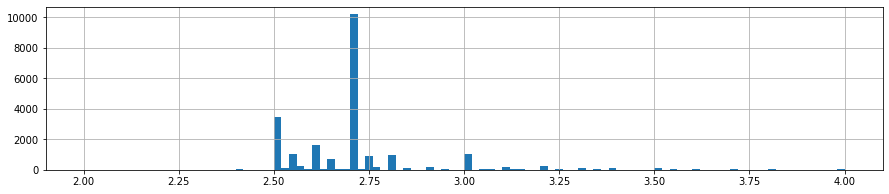

In [72]:
#ceiling_height
data.ceiling_height.hist(bins = 100, figsize = (15,3),range =(2,4));

In [73]:
data=data.query('2.5 <= ceiling_height <= 3.4')

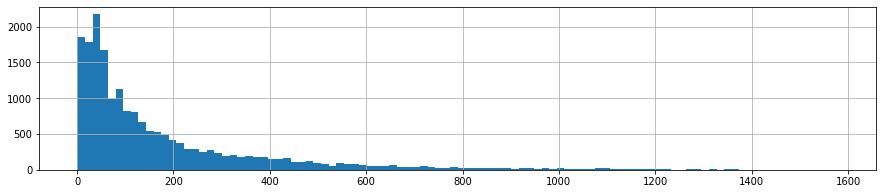

In [74]:
#days_exposition
data.days_exposition.hist(bins = 100, figsize = (15,3));

In [75]:
data=data.loc[(data['days_exposition'].isna()) | (data['days_exposition'] < 1000) & (data['days_exposition'] > 2)]
data.shape

(21861, 22)

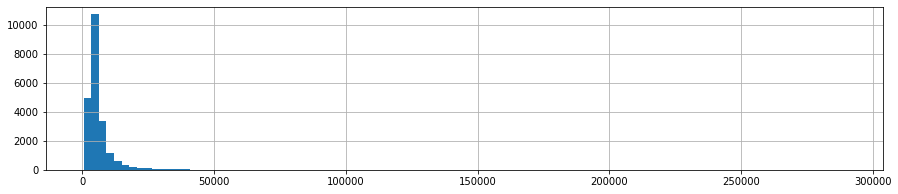

In [76]:
#last_price
data.last_price.hist(bins = 100, figsize = (15,3));

In [77]:
data = data.query('last_price <= 20000')

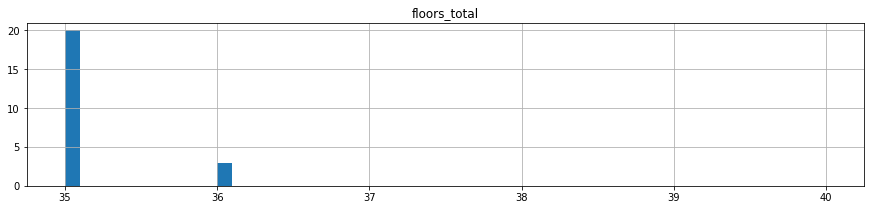

In [80]:
data.hist(column = 'floors_total', bins = 50, figsize = (15,3), range = (35,40));

In [81]:
data=data.loc[(data['floors_total'].isna()) | (data['floors_total'] <= 36)]

### Посчитайте и добавьте в таблицу новые столбцы

Добавляем в таблицу новый столбец, в котором будет указана цена за квадратный метр по каждой отдельной квартире, округлим полученные значения до сотых.

In [82]:
data['one_m_price']=round((data['last_price'] / data['total_area']),2)

Также добавляем в таблицу столбцы с указаниями дня недели, месяца и года публикации обьявления о продаже квартиры.

In [83]:
data['week_day']=data['first_day_exposition'].dt.weekday

In [84]:
data['month_exposition']=data['first_day_exposition'].dt.month

In [85]:
data['year_exposition']=data['first_day_exposition'].dt.year

Добавляем новый столбец с типами расположения в доме продаваемых квартир.Первый этаж(1), последний(0) или другой(-).

In [86]:
data['floors_total']=data['floors_total'].astype('int')
data['floor_type']='Другой'
data.loc[data['floor'] == 1,'floor_type'] = 'Первый'
data.loc[(data['floor'] == data['floors_total']) & (data['floors_total'] != 1),'floor_type'] = 'Последний'

In [87]:
data[data['floors_total'] == 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_m_price,week_day,month_exposition,year_exposition,floor_type
3076,20,2000.0,80.0,2018-01-03,3,2.70,1,48.50,1,False,...,0,0,0,0,44.0,25.00,2,1,2018,Первый
4379,5,5300.0,58.5,2017-11-15,2,2.70,1,31.60,1,False,...,0,0,0,0,226.0,90.60,2,11,2017,Первый
5698,7,450.0,42.0,2017-07-31,2,2.70,1,23.00,1,False,...,0,0,0,0,233.0,10.71,0,7,2017,Первый
5787,16,9000.0,88.0,2018-08-06,3,2.70,1,52.80,1,False,...,0,0,1,792,60.0,102.27,0,8,2018,Первый
7962,4,550.0,46.2,2018-04-20,3,2.70,1,27.72,1,False,...,0,0,0,0,45.0,11.90,4,4,2018,Первый
8335,10,2700.0,80.0,2018-07-07,3,3.00,1,45.00,1,False,...,0,0,0,0,51.0,33.75,5,7,2018,Первый
8388,20,3550.0,48.2,2019-03-30,3,2.65,1,33.90,1,False,...,0,0,0,0,NaN,73.65,5,3,2019,Первый
9517,4,1200.0,39.4,2018-01-08,2,2.70,1,23.64,1,False,...,0,0,0,0,45.0,30.46,0,1,2018,Первый
9752,16,850.0,62.0,2018-11-10,2,2.70,1,31.00,1,False,...,0,0,0,0,NaN,13.71,5,11,2018,Первый
10817,6,790.0,50.6,2017-11-29,3,2.70,1,32.00,1,False,...,0,0,0,0,NaN,15.61,2,11,2017,Первый


Добавляем столбец с указанием дальности нахождения квартиры от цента, указанную в километрах, округляем значения до целых.

In [88]:
data['center_km']=round(data['city_centers_nearest'] /1000 , 0)

### Проведите исследовательский анализ данных

In [89]:
import matplotlib.pyplot as plt

count    21345.000000
mean        56.470634
std         23.443227
min         21.100000
25%         40.000000
50%         51.000000
75%         66.900000
max        287.500000
Name: total_area, dtype: float64

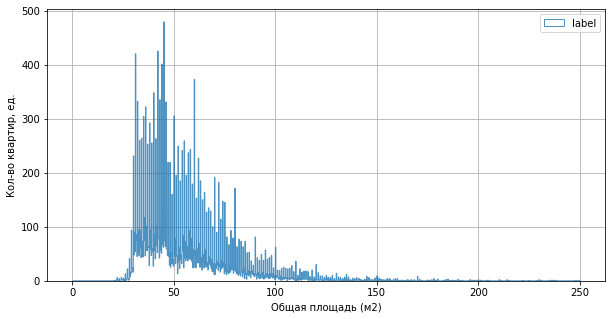

In [90]:
data.plot(kind='hist', y='total_area', histtype='step', bins=1000, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True, figsize=(10,5),
         range=(0,250))
plt.xlabel('Общая площадь (м2)')
plt.ylabel('Кол-во квартир, ед.')
data['total_area'].describe()

БОльшая часть продаваемых квартир имеет метраж до 100м2, основная масса квартир имеет метраж около 40-50м2. Нельзя сделать точных выводов относительно спроса на квартиры опираясь на данный график. Зато можно сделать вывод, что найти и купить квартиру более 200м2 не слишком просто, так как таких квартир  не сильно много. Самая маленькая квартира размером в 21м2, самая большая имеет размер аж в 287м2. Возможно данные о квартирах более 200м2 были введены неправильно и имеющиеся значения нужно разделить на 10 для более корректного вида, но это стоит уточнить.

count    21345.000000
mean        32.226949
std         15.673758
min          8.000000
25%         18.800000
50%         30.000000
75%         40.900000
max        183.700000
Name: living_area, dtype: float64

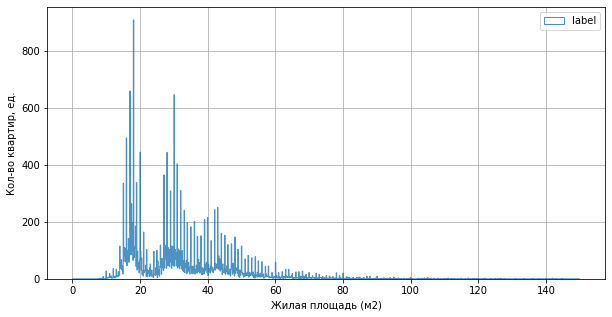

In [91]:
data.plot(kind='hist', y='living_area', histtype='step', bins=1000, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
         figsize=(10,5), range=(0,150))
plt.xlabel('Жилая площадь (м2)')
plt.ylabel('Кол-во квартир, ед.')
data['living_area'].describe()

В продаже имеются квартиры с минимально разрешенной жилой площадью в 8м2 и квартиры с метражом в 183м2. В среднем, размер жилой площади в продаваемых квартирах составляет 32м2, что практически больше половины площади от среднего общего размера квартиры, что достаточно нормально. По графику видно, что большинство квартир имеют размер жилой площади примерно в и 20м2 и 30м2, но между этими всплесками имеется провал,точнее, менее ~20 предложений с размерами жилой площади в примерно 25м2. Возможно, такой провал связан с типовой застройкой и поэтому большинство квартир имеют примерно одинаковый метраж жилой площади.

count    21345.000000
mean         9.837115
std          4.380142
min          4.000000
25%          7.000000
50%          9.000000
75%         11.200000
max         64.000000
Name: kitchen_area, dtype: float64

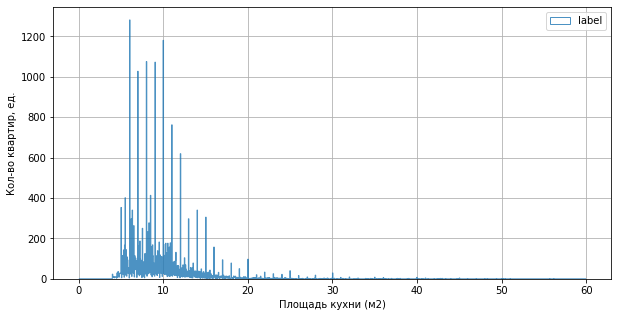

In [92]:
data.plot(kind='hist', y='kitchen_area', histtype='step', bins=1000, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
         figsize=(10,5), range=(0,60))
plt.xlabel('Площадь кухни (м2)')
plt.ylabel('Кол-во квартир, ед.')
data['kitchen_area'].describe()

Относительно размера кухонь, по графику мы видим определенные всплески на разных значениях размеров. Тут также можно предположить, что это связанно с типовой застройкой. Большая часть квартир имеет кухни метражом в ~10м2, что совпадает с медианым значением. Любителя большой кухни придется долго ждать подходящего варианта, так как предложений с кухней более 20м2 не слишком много.

count    21345.000000
mean      5364.764333
std       3117.531960
min        430.000000
25%       3400.000000
50%       4550.000000
75%       6400.000000
max      20000.000000
Name: last_price, dtype: float64

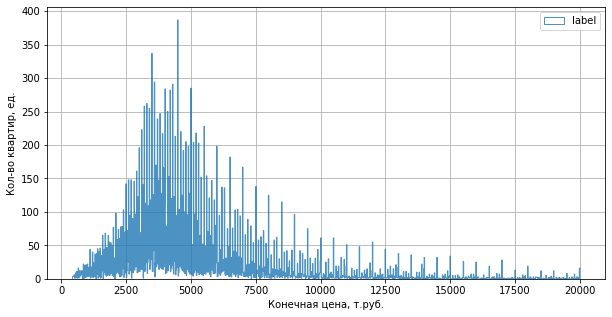

In [93]:
data.plot(kind='hist', y='last_price', histtype='step', bins=1000, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
          figsize=(10,5))
plt.xlabel('Конечная цена, т.руб.')
plt.ylabel('Кол-во квартир, ед.')

data['last_price'].describe()

Самая дешевая квартира иметт стоимость в 430 т.р., в то время как самая дорогая обойдется в 20млн.р. Учитывая минимальные и максимальные размеры квартир из предыдущих графиков, такому имеет место быть. И все же в основном стоимость квартиры в среднем составляет около 5млн.р.

count    21345.000000
mean         2.010963
std          0.952474
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

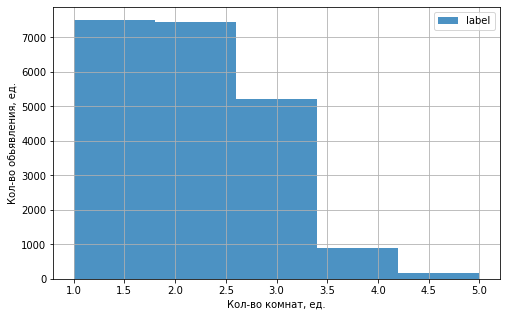

In [94]:
data.plot(kind='hist', y='rooms', bins=5, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
          figsize=(8,5), range=(1,5))
plt.xlabel('Кол-во комнат, ед.')
plt.ylabel('Кол-во обьявления, ед.')
data['rooms'].describe()

По большей части на продажу выставлены квартиры с 1 и 2 комнатами. Найти квартиру с 4 и более комнатами достаточно затруднительно, ведь таких квартир не так много. Самые большие показатели по квадратуре и количеству комнат, вероятно, принадлежат обьвлениям с квартирами в более 400м2

count    21345.000000
mean         2.690351
std          0.154335
min          2.500000
25%          2.600000
50%          2.700000
75%          2.700000
max          3.400000
Name: ceiling_height, dtype: float64

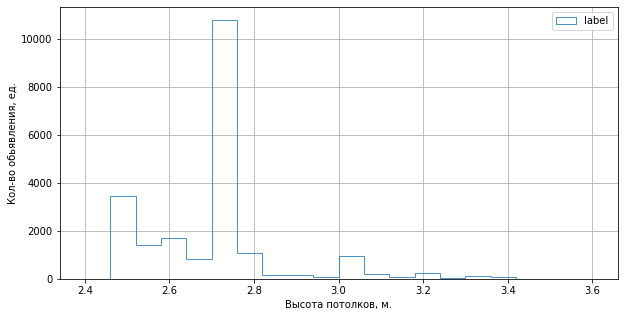

In [95]:
data.plot(kind='hist', y='ceiling_height', histtype='step', bins=20, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
          figsize=(10,5), range=(2.4,3.6))
plt.xlabel('Высота потолков, м.')
plt.ylabel('Кол-во обьявления, ед.')
data['ceiling_height'].describe()

Большинство квартир имеет высоту потолков не более 2,8 м. Вероятно, это тоже последствия типовой застройки. Квартир с потолками более 3м не так много.

count    21345.000000
mean         5.893792
std          4.862050
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

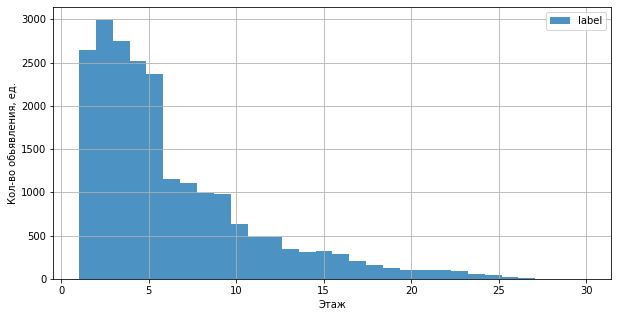

In [96]:
data.plot(kind='hist', y='floor', histtype='bar', bins=30, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
           figsize=(10,5), range=(1,30))
plt.xlabel('Этаж')
plt.ylabel('Кол-во обьявления, ед.')
data['floor'].describe()

Основная часть продаваемых квартир расположена не в высотках. Довольно сложно найти квартиру на этаже выше 10, зато, в Питере и области довольно часто продают квартиры на низких этажах(1-10).

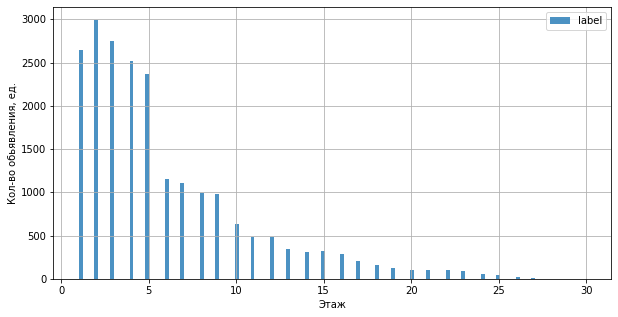

In [97]:
# check
data.plot(kind='hist', y='floor', histtype='bar', bins=130, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
           figsize=(10,5), range=(1,30))
plt.xlabel('Этаж')
plt.ylabel('Кол-во обьявления, ед.');

count      21345
unique         3
top       Другой
freq       15752
Name: floor_type, dtype: object

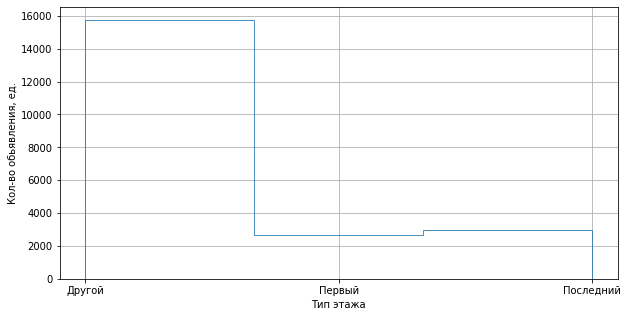

In [98]:
data['floor_type'].hist(histtype='step', bins=3, 
          linewidth=1, alpha=0.8, figsize=(10,5))
plt.xlabel('Тип этажа')
plt.ylabel('Кол-во обьявления, ед.')
data['floor_type'].describe()

Большинство квартир расположено в средних этажах, что еще раз подтверждает, что довольно сложно купить квартиру на верхнем этаже и любоваться видами Питера. Меньше всего на продажу выставляют квартиры на первом этаже, возможно это связано с тем, что многие квартиры на первом этаже давно выкуплены и переоборудованы для коммерческих целей, но это лишь предположение. Около 2000 обьявления с квартирами на последних этажах.

count    21345.000000
mean        10.761677
std          6.565181
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

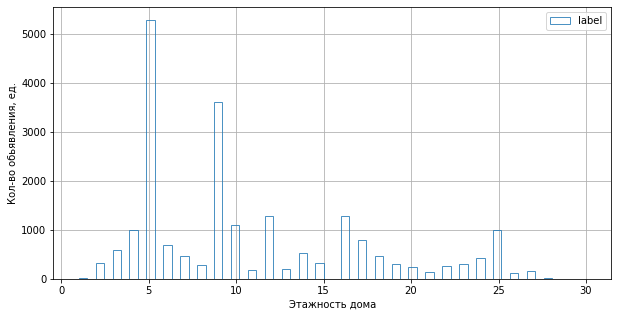

In [99]:
data.plot(kind='hist', y='floors_total', histtype='step', bins=60, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
           figsize=(10,5), range=(1,30))
plt.xlabel('Этажность дома')
plt.ylabel('Кол-во обьявления, ед.')
data['floors_total'].describe()

Неудивительно, что обьявлений с квартирами расположеными выше 10 этажей не так много. Как показывает график, в основном опубликованы обьявления о продаже квартир в 5-ти и 9-тиэтажных домах. Также всплеск есть и в районе шестнадцатиэтажных и двадцатипятиэтажных зданий. Виновата опять типовая застройка.

count    16296.000000
mean     14721.040221
std       8518.229205
min        287.000000
25%      10312.250000
50%      13370.000000
75%      16526.000000
max      65952.000000
Name: city_centers_nearest, dtype: float64

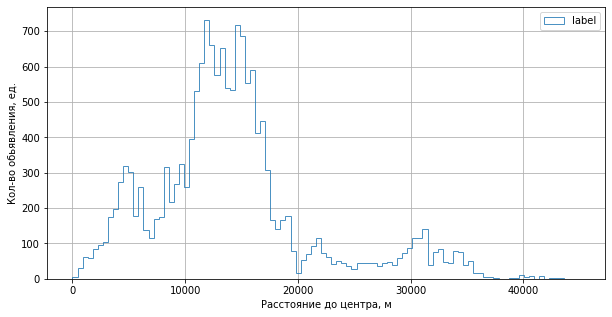

In [100]:
data.plot(kind='hist', y='city_centers_nearest', histtype='step', bins=100, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
          figsize=(10,5), range=(0,45000))
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Кол-во обьявления, ед.')
data['city_centers_nearest'].describe()

Большинство квартир находятся в пределах 20км от центра. В основном квартиры продаются в 12-16км от центра. Найти квартиру более чем за 20-30км от центра довольно затруднительно, хотя имеется обьявление о продаже квартиры с максимальной удаленностью от центра ~66км.

count    16296.000000
mean     29012.360051
std      12875.116106
min       6450.000000
25%      18320.500000
50%      27314.000000
75%      37636.000000
max      84853.000000
Name: airports_nearest, dtype: float64

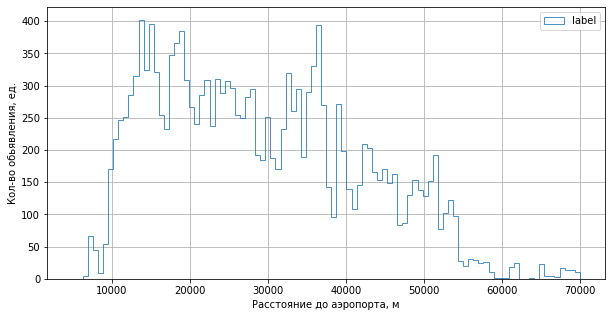

In [101]:
data.plot(kind='hist', y='airports_nearest', histtype='step', bins=100, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
          figsize=(10,5), range=(5000,70000))
plt.xlabel('Расстояние до аэропорта, м')
plt.ylabel('Кол-во обьявления, ед.')
data['airports_nearest'].describe()

Обьявлений о продаже квартиры прямо около аэропорта нет (минимум в 6,5км).Основная масса квартир имеет удаленность 10-40км от аэропорта,хотя обьявлений о продаже квартир в 30км от аэропорта значительно меньше ,чем в 23км или 35км.

count    21345.000000
mean       160.727477
std        301.978342
min          0.000000
25%          0.000000
50%          0.000000
75%        280.000000
max       3190.000000
Name: parks_nearest, dtype: float64

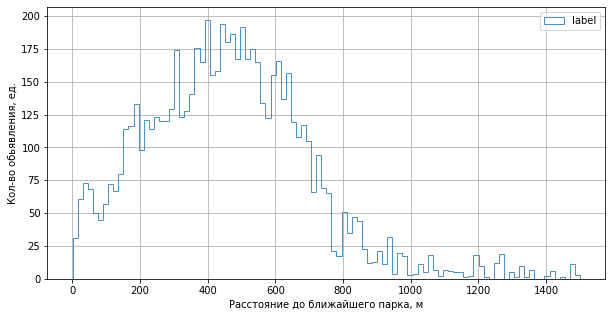

In [102]:
data.plot(kind='hist', y='parks_nearest', histtype='step', bins=100, 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
         figsize=(10,5), range=(1,1500))
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Кол-во обьявления, ед.');
data['parks_nearest'].describe()

Большинство квартир, имеющих в ближайшем расположении парки, находятся в 400-600 метрах от дома. Есть и обьявления с 0км, но это,скорее,означает, что рядом парков нет, нежели что квартира расположена прямо посреди парка. По этому можно сделать вывод, что квартир, с расположеными рядом парками не так много, а максимальное удаление от парка составляет всего 3км.

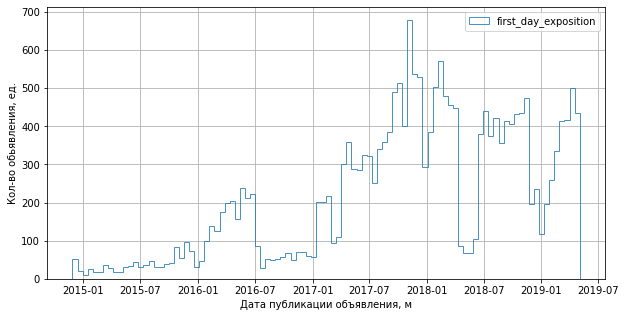

In [103]:
data['first_day_exposition'].hist(histtype='step', bins=100, 
          linewidth=1, alpha=0.8,legend=True,figsize=(10,5))
plt.xlabel('Дата публикации объявления, м')
plt.ylabel('Кол-во обьявления, ед.');


По графику можно заметить когда был всплеск публикации обьявлений и когда обьявления о продаже публиковались довольно мало. Основной пик продажи пришелся на конец 2017 и начало 2018 года года. Меньше всего обьявлений публиковалось в 2015 году, но мы видим, что, практически, с каждым годом, количество публикаций увеличивалось. Скорее всего, это связано не с потребностью петербужцев, а с тем, что сервис Яндекс.Недвижимость тогда еще не был так популярен и основная масса обьявлений о продаже публиковалась на стронних ресурсах.

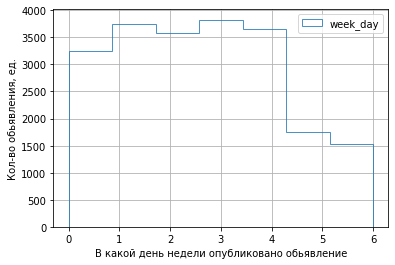

In [104]:
data['week_day'].hist(histtype='step', bins=7, 
          linewidth=1, alpha=0.8,legend=True)
plt.xlabel('В какой день недели опубликовано обьявление')
plt.ylabel('Кол-во обьявления, ед.');

По графику, можно сказать, что реже всего обьявления публиковались в выходные дни и чуть чаще в понедельник. В остальном, сильных изменений в публикации обьявлений по дням недели нет.

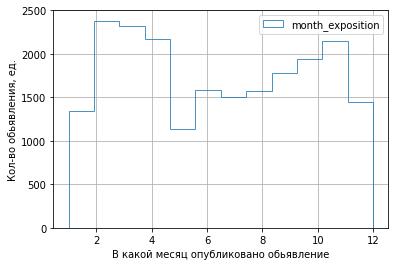

In [105]:
data['month_exposition'].hist(histtype='step', bins=12, 
          linewidth=1, alpha=0.8,legend=True)
plt.xlabel('В какой месяц опубликовано обьявление')
plt.ylabel('Кол-во обьявления, ед.');

Наименее охотно люди выкладывают объявления о продаже квартир в январе,мае и декабре. Праздники такие праздники :) Также не очень высокие показатели и  летний период. Больше всего обьявлений было опубликовано с февраля по апрель, а также в ноябре.

In [106]:
data[data['month_exposition']==2].pivot_table(index='year_exposition',values='last_price',aggfunc='count')

,last_price
year_exposition,
2015,32
2016,232
2017,391
2018,1227
2019,500


На такое большое количество обьявлений в самом коротком месяце в году повлиял февраль 2018 года, тогда было опубликовано практически в два раза больше обьевления чем за следующий год аналогичного периода и в 4 раза больше, чем за предыдущий год аналогичного периода. Возможно, на это могли повлиять какие-то мировые события.

В основном обьявления о продаже не висели на сайте более 220 дней,основная масса обьявлений снимается с публикации уже на 45 день и 60 день, т.е квартиры либо продавались менее чем за пару месяцев либо имеется техническая причина снятия их с публикации. Хотя есть квартиры, которые были сняты с публикации в первые же дни. Возможно,квартиры действительно успели продать за это время, но вероятнее, повлияли какие-то сторонние факторы.

In [109]:
print('Корреляция по общей площади',data['last_price'].corr(data['total_area']))
print('Корреляция по жилой площади',data['last_price'].corr(data['living_area']))
print('Корреляция по площади кухни',data['last_price'].corr(data['kitchen_area']))
print('Корреляция по количеству комнат',data['last_price'].corr(data['rooms']))
print('Корреляция по этажу',data['last_price'].corr(data['floor']))
print('Корреляция по дате размещения:день недели',data['last_price'].corr(data['week_day']))
print('Корреляция по дате размещения:месяц',data['last_price'].corr(data['month_exposition']))
print('Корреляция по дате размещения:год',data['last_price'].corr(data['year_exposition']))

Корреляция по общей площади 0.7691193099486988
Корреляция по жилой площади 0.661695884796708
Корреляция по площади кухни 0.5913969800358664
Корреляция по количеству комнат 0.4986425385016028
Корреляция по этажу 0.1153240709084775
Корреляция по дате размещения:день недели -0.013385931400523899
Корреляция по дате размещения:месяц 0.006233599649836923
Корреляция по дате размещения:год -0.008077470880543927


Наиболее сильную зависимость цены можно увидеть от квадратуры квартиры, что логично: чем больше площадь квартиры -тем она дороже. Также, не сильную, но все же зависимость цены квартиры можно наблюдать от площади кухни и жилой площади. На цену практически не влияет дата размещения обьявления, этаж, на которой расположена квартира, а также количество комнат.

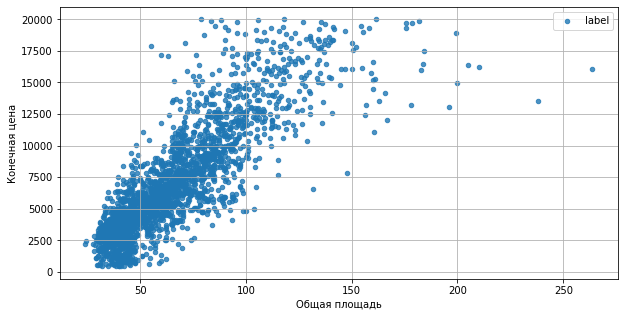

In [110]:
data_coor=data.pivot_table(index='last_price', values=['total_area','living_area','kitchen_area',
                                                       'rooms','floor','week_day',
                                                       'month_exposition','year_exposition'],
                           aggfunc='mean').reset_index()

data_coor.plot(kind='scatter',x='total_area', y='last_price', 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
          figsize=(10,5));
plt.xlabel('Общая площадь')
plt.ylabel('Конечная цена');

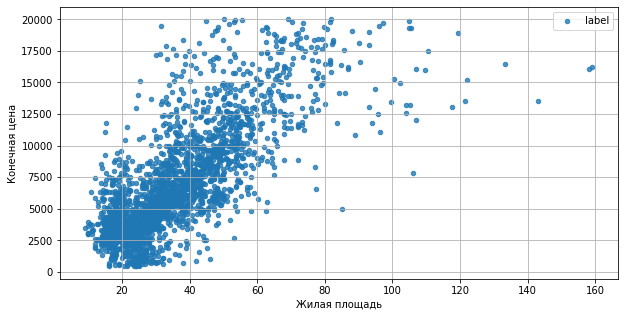

In [111]:
data_coor.plot(kind='scatter',x='living_area', y='last_price', 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
          figsize=(10,5));
plt.xlabel('Жилая площадь')
plt.ylabel('Конечная цена');

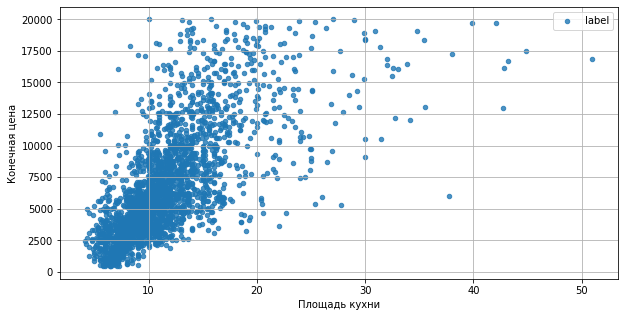

In [112]:
data_coor.plot(kind='scatter',x='kitchen_area', y='last_price', 
          linewidth=1, alpha=0.8, label='label', grid=True, legend=True,
          figsize=(10,5));
plt.xlabel('Площадь кухни')
plt.ylabel('Конечная цена');

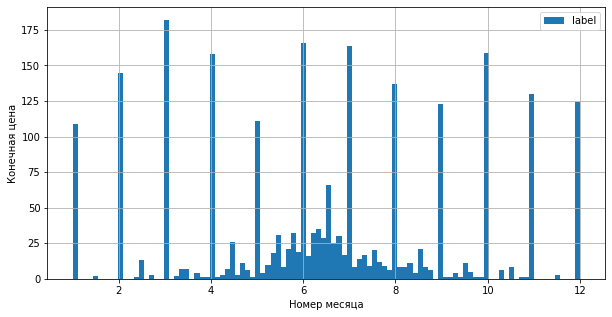

In [113]:
data_coor.plot(kind='hist',x='last_price', y='month_exposition', 
          linewidth=1, label='label', grid=True, legend=True,
          figsize=(10,5),bins=100);
plt.xlabel('Номер месяца')
plt.ylabel('Конечная цена');

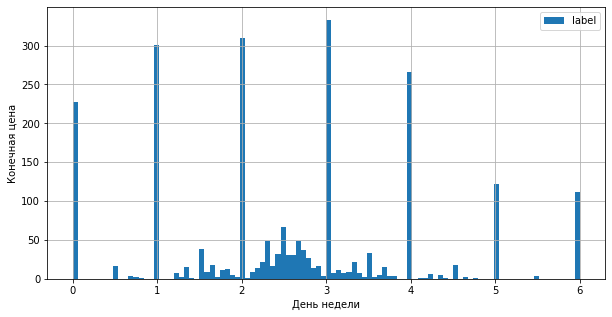

In [114]:
data_coor.plot(kind='hist',histtype='bar',x='last_price', y='week_day', 
          linewidth=1, label='label', grid=True, legend=True,
          figsize=(10,5),bins=100);
plt.xlabel('День недели')
plt.ylabel('Конечная цена');

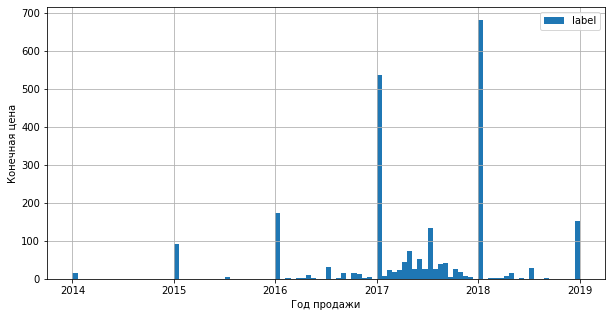

In [115]:
data_coor.plot(kind='hist',histtype='bar',x='last_price', y='year_exposition', 
          linewidth=1, label='label', grid=True, legend=True,
          figsize=(10,5),bins=100);
plt.xlabel('Год продажи')
plt.ylabel('Конечная цена');

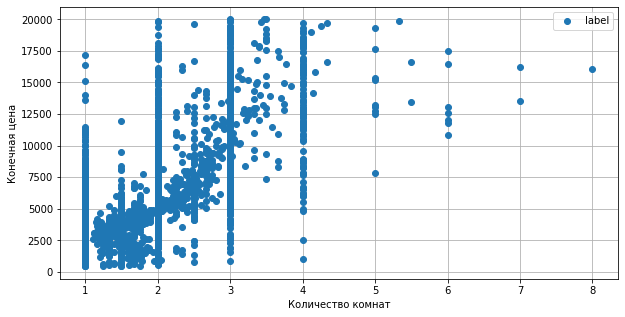

In [116]:
data_coor.plot(x='rooms', y='last_price', 
          linewidth=1, label='label',style='o', grid=True, legend=True,
          figsize=(10,5));
plt.xlabel('Количество комнат')
plt.ylabel('Конечная цена');

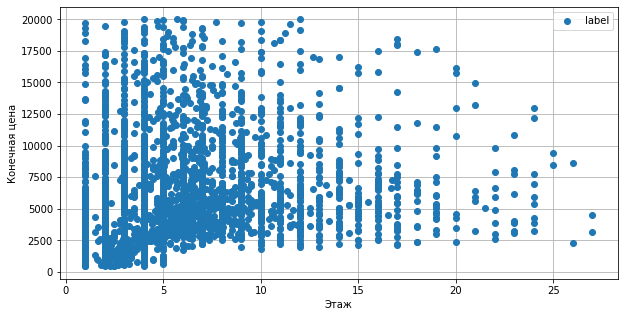

In [117]:
data_coor.plot(x='floor', y='last_price', 
          linewidth=1, label='label',style='o', grid=True, legend=True,
          figsize=(10,5));
plt.xlabel('Этаж')
plt.ylabel('Конечная цена');

По диаграммам можно увидеть, что действительно, с ростом общей площади квартиры увеличивается и площадь жилого пространства, кухни и количество комнат. Дата размещения обьявления не имеет четких границ или направлений, но зависимость площадей от времени публикации распологается как бы столбцами, по чему можно сделать вывод, что корреляция очень низкая.

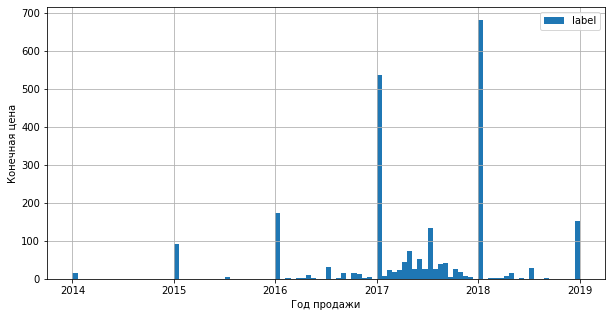

In [118]:
data_coor.plot(kind='hist',histtype='bar',x='last_price', y='year_exposition', 
          linewidth=1, label='label', grid=True, legend=True,
          figsize=(10,5),bins=100);
plt.xlabel('Год продажи')
plt.ylabel('Конечная цена');

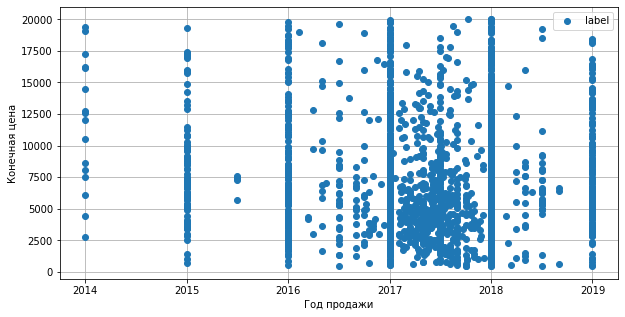

In [119]:
data_coor.plot(x='year_exposition', y='last_price', 
          linewidth=1, label='label',style='o', grid=True, legend=True,
          figsize=(10,5));
plt.xlabel('Год продажи')
plt.ylabel('Конечная цена');

In [121]:
df=round(data.pivot_table(index='locality_name', values=['one_m_price'],
                          aggfunc=['count','mean']),2)
df.columns=['count','mean']
df_sorted=df.sort_values(by='count',ascending=False)
df_sort_m=(df.sort_values(by='mean',ascending=False))
print(df_sorted.head(10))
print()
print('Максимальная стоимость м2',df_sort_m[df_sort_m['mean'] == df_sort_m['mean'].max()]['mean'])
print()
print('Минимальная стоимость м2',df_sort_m[df_sort_m['mean'] == df_sort_m['mean'].min()]['mean'])

                 count    mean
locality_name                 
Санкт-Петербург  13933  107.93
Мурино             510   85.03
Шушары             423   78.00
Кудрово            415   94.52
Всеволожск         367   67.00
Пушкин             337  101.66
Колпино            329   75.25
Парголово          318   89.98
Гатчина            299   68.75
Выборг             213   57.97

Максимальная стоимость м2 locality_name
Лисий Нос    113.73
Name: mean, dtype: float64

Минимальная стоимость м2 locality_name
Старополье    11.21
Name: mean, dtype: float64


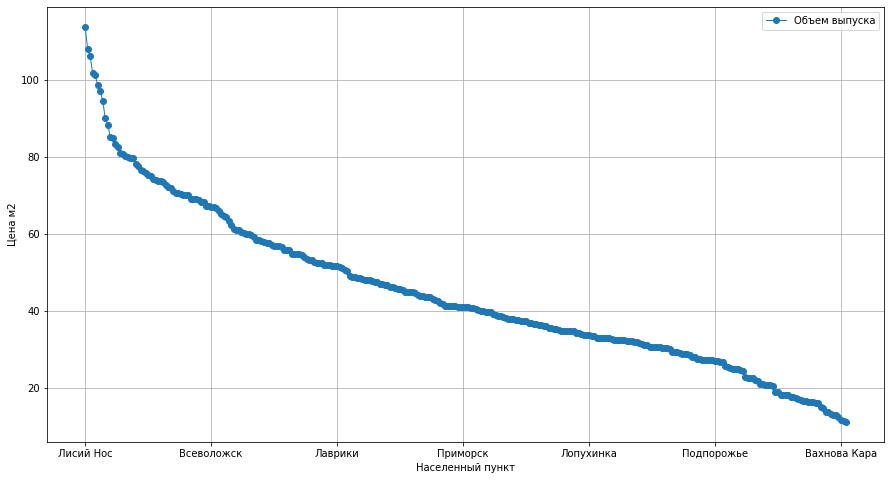

In [123]:
df_sort_m.plot(y='mean', 
          linewidth=1, label='label',style='o-', grid=True, legend=True,
          figsize=(15,8));
plt.xlabel('Населенный пункт')
plt.ylabel('Цена м2');
plt.show;

Не удивительно, что Санкт-Петербург превосходит по количеству обьявлений близлежащие населенные пункты и имеет самую высокую цену за м2 среди топ-10 населенных пунктов по количеству обьявлений. Но удивительно, что это не самая высокая цена среди всех населенных пунктов. Самый дорогой м2 обнаружен в населенном пункте Лисий Нос. Самый дешевый м2 можно преобрести в населенном пункте Старополье.

(не нашла как сделать, чтобы в сетке отображались все имена населенных пунктов)

In [123]:
df_sort_m

,count,mean
locality_name,,
Лисий Нос,2,113.73
Санкт-Петербург,13933,107.93
Зеленогорск,23,106.04
Пушкин,337,101.66
Сестрорецк,176,101.15
...,...,...
Тесово-4,1,12.93
Совхозный,2,12.63
Вахнова Кара,1,11.69


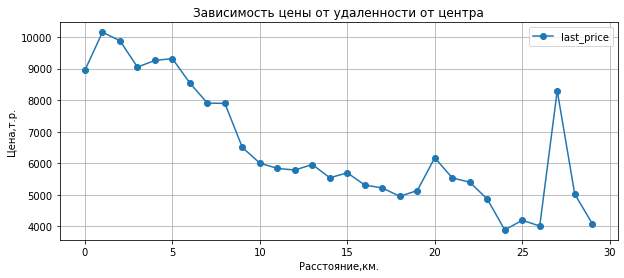

In [125]:
sp=data[data['locality_name'] == 'Санкт-Петербург']
sp_pivot=sp.pivot_table(index='center_km', values='last_price')
sp_pivot.reset_index(inplace= True )
sp_pivot
sp_pivot.plot(style='o-',x='center_km',y='last_price',grid=True,title='Зависимость цены от удаленности от центра',figsize=(10,4))
plt.xlabel('Расстояние,км.')
plt.ylabel('Цена,т.р.');

По графику видно, что самая дорогая недвижимость расположена достаточно близко к центру Питера. Но тем не менее, нельзя сказать, что цена сильно зависит от этого. Мы видим скачки в стоимости на удалении в 7км и 27 км от центра. Возможно, на этих расстояниях расположены какие-то элитные ЖК, исторические центры или, опять же, Финский залив. Снижение цен по удалению от центра происходит, но не сильно гладко.

In [126]:
data[(data['center_km']==27) & (data['locality_name'] == 'Санкт-Петербург')].sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_m_price,week_day,month_exposition,year_exposition,floor_type,center_km
748,13,14350.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496,0,0,128.0,193.92,1,11,2017,Другой,27.0
5961,6,2250.0,32.0,2018-02-27,1,2.70,2,16.5,2,False,...,0,0,0,178.0,70.31,1,2,2018,Последний,27.0


На 27-м км от центра Спб распологаются две квартиры, одна из которых имеет завышенную цену для своей квадратуры, поэтому и цена за метр квадратный так повлияла на график.

In [127]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_m_price,week_day,month_exposition,year_exposition,floor_type,center_km
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755,NaN,120.37,3,3,2019,Другой,16.0
1,7,3350.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,0,0,0,81.0,82.92,1,12,2018,Первый,19.0
2,10,5196.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,90,2,574,558.0,92.79,3,8,2015,Другой,14.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121.0,100.00,1,6,2018,Другой,8.0
5,10,2890.0,30.4,2018-09-10,1,2.70,12,14.4,5,False,...,0,0,0,55.0,95.07,0,9,2018,Другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350.0,30.0,2017-07-07,1,2.70,5,17.5,4,False,...,0,0,0,413.0,45.00,4,7,2017,Другой,NaN
23693,9,4600.0,62.4,2016-08-05,3,2.60,9,40.0,8,False,...,352,1,675,239.0,73.72,4,8,2016,Другой,34.0
23695,14,3100.0,59.0,2018-01-15,3,2.70,5,38.0,4,False,...,0,0,0,45.0,52.54,0,1,2018,Другой,NaN
23696,18,2500.0,56.7,2018-02-11,2,2.70,3,29.7,1,False,...,0,0,0,NaN,44.09,6,2,2018,Первый,NaN


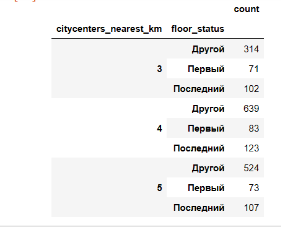

In [128]:
data[(data['center_km'] <= 5) & (data['center_km'] >= 3)].pivot_table(index=['center_km','floor_type']
                                                                      ,values='week_day',
                                                                      aggfunc='count')



week_day
center_km floor_type          
3.0       Другой           155
          Первый            42
          Последний         66
4.0       Другой           372
          Первый            61
          Последний         80
5.0       Другой           504
          Первый            63
          Последний         91

Распределение определенного типа этажности квартир на 3,4 и 5 км от центра получилось следующим:
На 3км: 58% - другой, 16% - первый, 26% - последний
На 4км: 73% - другой, 12% - первый, 15% - последний
На 5км: 78% - другой, 10% - первый, 12% - последний
На каждом выбранном километре наибольшее число обьявлений о продаже квартир на "Других" этажах. Но на третьем километре большее процентное содержание квартир расположенных на первых и последних этажах.Видимо, из-за этого, произошел провал в диаграмее, так как такие квартиры часто стоят дешевле.


### Общий вывод

Проведя анализ обьявлений по продаже квартир в Санкт-Петербурге и области, можно сделать выводы, что в основном публикуются обьявления о продаже квартир в типовых постройках, где общая площадь квартиры составляет около 40-70м2, с соответствующими размерами жилой площади в 18-40м2 и кухонь в 7-11м2. Основную часть обьявлений занимаю двух-трехкомнатные квартиры, расположенные на средних этажах не высотных домов (в основном в домах в 5, 16 и 25 этажей).В основной части квартир высота потолков не превышает 3 метров. В среднем, данные квартиры стоят около 5 млн.руб. На цену влияет площадь квартиры, и удаленность ее от центра города. Самое большое количество обьявленийй о продаже размещено в самом Санкт-Петербурге, при этом, больше всего заплатить за м2 придется за недвижимость в пригороде Питера - в населенном пункте Лисий Нос. Дешевле всего м2 обойдется в населенном пункте Старополье. Наибольшее число обьявлений было опубликовано в период 2018 года. Скачок количества публикации обьявлений о продаже произошел в 2017 году. Большая часть обьявлений была снята с публикации на 45 и 60 день после публикации, процент первых выше, поэтому, снятие публикаций на 45 день может иметь техническую причину. При этом остается часть обьявлений без данных о продолжительности размещения обьявлений,возможно, некоторые квартиры продаются уже слишком долго, либо в данных ошибка. Реже обычного обьявления публикуются в выходные дни, если смотреть по дням недели, и в месяца с продолжие Большинство квартир не имеет в ближайшем расположении парков, средняя удаленность квартир от аэропортов составляет примерно 19-36км. Из полученных данных можно сложить картину среднестатистической квартиры, публикуемой на сайте Яндекс.Недвижимость. Количество обьявлений с нестандартными квартирами крайне мало( более 200м2, более 5 комнат, выше 30 этажа и т.д.)